**Imports and workspace setting**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport

from sklearn_lvq import GlvqModel
from sklearn_lvq.utils import plot2d

plt.style.use('ggplot')

**Loading data file**

In [73]:
cancerData = pd.read_csv('../data/breast-cancer-wisconsin.data', header=None)
cancerData.drop(cancerData.columns[0],axis=1,inplace=True)
cancerData = cancerData.replace('?', np.nan)
cancerData.head()

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


**Stats of the data**

In [74]:
cancerData.shape

(699, 10)

**Class distribution of benign (2) and malignant (4)**

Class distribution is skewed towards benign.

Text(0.5, 0, 'Class')

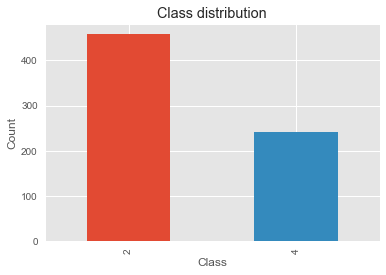

In [75]:
axes = cancerData[10].value_counts().plot(kind='bar', title='Class distribution')
axes.set_ylabel('Count')
axes.set_xlabel('Class')

**Drop missing values (16 values with ? mark)**

In [76]:
cancerDataAfterMissingValuesDropped = cancerData.dropna()
cancerDataAfterMissingValuesDropped.shape

(683, 10)

In [77]:
y = cancerDataAfterMissingValuesDropped.values[:,-1]
y=y.astype('int')
y.shape

(683,)

In [78]:
X = cancerDataAfterMissingValuesDropped.values[:,:-1]
X=X.astype('int')
X.shape

(683, 9)

**Holdout to create training (65%) and testing (35%) dataset**

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=8)
print (str(X_train.shape) +","+ str(y_train.shape))
print (str(X_test.shape) +","+ str(y_test.shape))

(443, 9),(443,)
(240, 9),(240,)


**Fit LVQ (Linear Vector Quantizaion) model**

In [80]:
glvq = GlvqModel()
glvq.fit(X_train, y_train)

GlvqModel(C=None, beta=2, display=False, gtol=1e-05, initial_prototypes=None,
     max_iter=2500, prototypes_per_class=1, random_state=None)

In [81]:
predictions = glvq.predict(X_test)

In [82]:
score = glvq.score(X_test, y_test)
print('Accuracy score = ', score)

Accuracy score =  0.9708333333333333


**Classification report**

In [83]:
target_names = ['2 (benign)', '4 (malignant)']
print(metrics.classification_report(y_test,predictions, target_names=target_names, digits=3))

               precision    recall  f1-score   support

   2 (benign)      0.967     0.986     0.976       147
4 (malignant)      0.978     0.946     0.962        93

    micro avg      0.971     0.971     0.971       240
    macro avg      0.972     0.966     0.969       240
 weighted avg      0.971     0.971     0.971       240



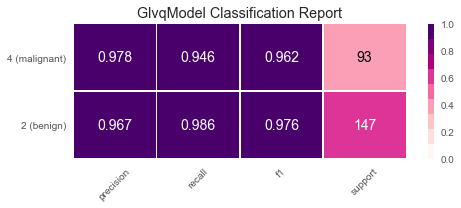

In [90]:
fig, ax = plt.subplots(figsize=(7,3))
visualizer = ClassificationReport(glvq, classes=target_names, support=True, cmap='RdPu')
visualizer.score(X_test, y_test)
for label in visualizer.ax.texts:
    label.set_size(14)
g = visualizer.poof()

**Confusion metrix**

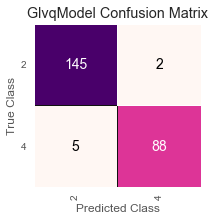

In [93]:
fig, ax = plt.subplots(figsize=(3,3))
cm = ConfusionMatrix(glvq, classes=[2,4], cmap='RdPu')
cm.score(X_test, y_test)
for label in cm.ax.texts:
    label.set_size(14)
cm.poof()

**Conclusion**
01. Model works really well and provides 97% accuracy which is just below accuracy of random forest.
02. Recall and F1 score of malignent class is less than benign class. This might be because class skewness.
03. False negative count is high (5) which is not good in this application.